<a href="https://colab.research.google.com/github/Anshulchauhan11/-youtube-vedio-Text-summarizer/blob/main/projectai_tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q transformers

In [2]:
!pip install -q youtube_transcript_api

In [3]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi


In [28]:
youtube_video = "https://www.youtube.com/watch?v=8KkKuTCFvzI"

In [29]:
video_id = youtube_video.split("=")[1]

In [30]:
video_id

'8KkKuTCFvzI'

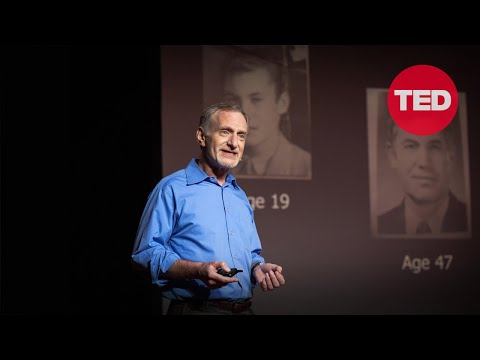

In [31]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [32]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id)


In [33]:
#check it have text or not
transcript[0:5]

[{'text': 'What keeps us healthy and happy', 'start': 12.756, 'duration': 3.0},
 {'text': 'as we go through life?', 'start': 15.756, 'duration': 1.583},
 {'text': 'If you were going to invest now', 'start': 18.506, 'duration': 2.5},
 {'text': 'in your future best self,', 'start': 21.048, 'duration': 2.041},
 {'text': 'where would you put your time\nand your energy?',
  'start': 23.131,
  'duration': 2.958}]

In [34]:

result = ""
for i in transcript:
    result += ' ' + i['text']
#print(result)
print(len(result))

9644


In [35]:
#summary piple of transofrmer to summarize the text meaningful
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [36]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  print("input text \n" + result[start:end])
  out = summarizer(result[start:end])
  out = out[0]
  out = out['summary_text']
  print("Summarized text\n"+out)
  summarized_text.append(out)

#print(summarized_text)

input text 
 What keeps us healthy and happy as we go through life? If you were going to invest now in your future best self, where would you put your time
and your energy? There was a recent survey of millennials asking them what their
most important life goals were, and over 80 percent said that a major life goal for them
was to get rich. And another 50 percent
of those same young adults said that another major life goal was to become famous. (Laughter) And we're constantly told
to lean in to work, to push harder and achieve more. We're given the impression that these
are the things that we need to go after in order to have a good life. Pictures of entire lives, of the choices that people make
and how those choices work out for them, those pictures
are almost impossible to get. Most of what we know about human life we know from asking people
to remember the past, and as we know, hindsight
is anything but 20/20. We forget vast amounts
of what happens to us in life, and sometimes memor

In [37]:
str(summarized_text)

'[" There was a recent survey of millennials asking them what their most important life goals were, and over 80 percent said that a major life goal for them was to get rich . We\'re constantly told to lean in to work, to push harder and achieve more. We\'re given the impression that these are the things that we need to go after in order to have a good life .", " The Harvard Study of Adult Development may be the longest study of adult life that\'s ever been done . For 75 years, we\'ve tracked the lives of 724 men, year after year, asking about their work, home lives, health, and of course asking all along the way . Studies like this are exceedingly rare .", " Since 1938, we\'ve tracked the lives of two groups of men in the Boston of the 1930s . The first group started in the study when they were sophomores at Harvard College . The second group was a group of boys from Boston\'s poorest neighborhoods . Most lived in tenements, many without hot and cold running water .", \' The founders o

In [38]:
len(str(summarized_text))

3272

text summerization


In [14]:
ARTICLE = """
The one overwhelming piece of feedback I've seen about the new iPhone 16 is that it looks pretty. The new teal, ultramarine, and pink colors are more vivid than previous ones, thanks to a new manufacturing process, which Apple says infuses color throughout the glass back of the phone. The iPhone 16 Pro colors are boring, and I agree.

There are no sweeping changes to the iPhone 16 over its predecessor. Yes, there's a new Camera Control button, and the Action Button has trickled down from the Pro, but nearly every other part of the device is an iterative upgrade. I've also now been living with Apple Intelligence for a few weeks—at least, a beta version of it with some missing features—and it's safe to say that while there are a few features that will be very helpful day-to-day for some folks, it is not a reason to upgrade, especially if your iPhone is functioning fine.

All that said, this iPhone has a beefier battery and a more powerful processor, and it is easier to repair. Its cameras are more than capable. Combined with the fact that Face ID is still unrivaled, the Dynamic Island has grown on me, and I'm still waiting for MagSafe-like charging to make its way to Android phones. It doesn't feel like the iPhone 16 needs much more.

Why Go Pro?
Apple spends a lot of time on prosumer features in its iPhone Pro models, but very few people will use them. ProRes? Log video recording? Academy Color Encoding System? If none of those words matter to you, then there are only a few reasons to get the iPhone 16 Pro this year.

The main things have to do with the display. The iPhone 16 Pro models have bigger screens now, one-upping the 6.1-inch and 6.7-inch OLED screens on the iPhone 16 and iPhone 16 Plus. This change is more effective on the iPhone 16 Pro, but it makes the iPhone 16 Pro Max too unwieldy. The screen sizes on the non-Pro iPhones never leave me wanting. On the non-Pro iPhone, you don't have the always-on display, but I don't mind that it's not here.Apple's more serious omission is the lack of ProMotion on the cheaper iPhones. This means you are stuck on a 60-Hz screen when almost every other smartphone at this price has a 120-Hz refresh rate. Maybe I'm nitpicking, but the first thing I said after switching from the iPhone 16 Pro to the iPhone 16 was, “Why is it laggy?” It's not that the phone performs poorly. The display refreshes 60 times per second, and when you move from screens that refresh 120 times, you're effectively seeing slower animations throughout. This tech will likely get ported down in 2025, but it's past due at this price.

The entire iPhone 16 lineup has Apple's new Ceramic Shield glass, which is supposedly twice as strong as the previous generation, but remember: Glass is still glass. I dropped the iPhone 16 Plus onto the pavement (a 4-foot drop), and the display cracked; business as usual. Get a case and screen protector! Build-wise, the Pro phones have a titanium frame versus aluminum on the standard iPhones, but durability-wise, they're all glass sandwiches. Titanium does make the Pro phones lighter, but the iPhone 16 and 16 Plus still weigh less.

Camera Control is the new button on the iPhone 16 range, and I'm getting used to it. I prefer to use it as a dedicated camera launch button, freeing up the Action Button (also new on a non-Pro iPhone) to trigger something else, like Silent mode. But you can put some light pressure on the Camera Control button to cycle through camera modes or scroll through different Photographic Styles—the revamped color-grading filters that let you add a look to your images pre-capture. I use the sliding function here and there but prefer to select the mode I want to shoot in by tapping the screen.
"""

In [15]:
summarizer(ARTICLE, max_length=130, min_length=30, do_sample=False)

[{'summary_text': ' There are no sweeping changes to the iPhone 16 over its predecessor . The new teal, ultramarine, and pink colors are more vivid than previous ones . This iPhone has a beefier battery and a more powerful processor, and it is easier to repair .'}]